Upload final cleaned dataset after performing EDA 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
DATA_DIR = Path('LoanData')

#read in 'loans_final.csv' which is the cleaned dataset to be used for loan default modeling
loans_final_path = DATA_DIR / 'loans_final.csv'
loans_final = pd.read_csv(loans_final_path)

In [100]:
loans_final.head()

,loan_indicator,int_rate,dti,delinq_2yrs,inq_last_6mths,revol_util,open_acc,annual_inc_norm,addr_state_FL,addr_state_GA,...,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_ 60 months
0,0,15.27,1.00,0.0,5.0,9.4,3.0,12.000000,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,15.96,8.72,0.0,2.0,98.5,2.0,5.105000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13.49,20.00,0.0,1.0,21.0,10.0,4.920000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,18.64,5.35,0.0,2.0,87.5,4.0,16.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21.28,5.55,0.0,2.0,32.6,11.0,7.142857,0,0,...,1,0,0,0,0,0,0,0,0,1


In [101]:
loans_final.shape

(159431, 82)

In [102]:
loans_final.columns

Index(['loan_indicator', 'int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'revol_util', 'open_acc', 'annual_inc_norm', 'addr_state_FL',
       'addr_state_GA', 'addr_state_IL', 'addr_state_NJ', 'addr_state_NY',
       'addr_state_OH', 'addr_state_PA', 'addr_state_TX', 'addr_state_VA',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year'

In [103]:
# Create X variable
loans_final_explanatory_var = loans_final.drop('loan_indicator',axis='columns') 
loans_final_explanatory_var.head()

,int_rate,dti,delinq_2yrs,inq_last_6mths,revol_util,open_acc,annual_inc_norm,addr_state_FL,addr_state_GA,addr_state_IL,...,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_ 60 months
0,15.27,1.00,0.0,5.0,9.4,3.0,12.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,15.96,8.72,0.0,2.0,98.5,2.0,5.105000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,13.49,20.00,0.0,1.0,21.0,10.0,4.920000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.64,5.35,0.0,2.0,87.5,4.0,16.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.28,5.55,0.0,2.0,32.6,11.0,7.142857,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Logistic Model to Predict Loan Status (0.5 Default Classification Threshold)

In [104]:
#Check accuracy via 5-fold cross-validation
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=5, shuffle=True)

X = loans_final_explanatory_var
y = loans_final.loc[:,'loan_indicator'] 
#recall that loan indicator = 1 for fully paid loans and 0 for non-fully-paid loans including defaulted loans

logit1 = LogisticRegression()
                 
cross_val_score(logit1, X, y, cv=kf, scoring='accuracy').mean()

#Fairly high accuracy score of ~80%. 

0.7856000626514581

In [105]:
# Compare my model's accuracy to null model accuracy 
import numpy as np
y_pred_null = np.zeros(y_test.shape)
metrics.accuracy_score(y_test, y_pred_null)

# My model has a much higher accuracy than null model (~80% vs. 20%) - indicates relatively low bias. Given class-imbalanced sample,
# however, (sample contains many more fully paid loans than not) overall model accuracy not the most informative metric.
# Thus will consider sensitivity (True Positive Rate) and specificity (True Negative Rate, or 1 - False Positive Rate) as
# alternative indicators of model informativeness, as well as area under ROC curve (AUC) as measure of how well model 
# classifies loans overall across all possible threshold probabilities.

0.21860103366952682

In [106]:
# Do simple train test split and compare test set and train set accuracy to evaluate variance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
logit1.fit(X_train, y_train)
y_pred = logit1.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred), 'test set accuracy')
print(metrics.accuracy_score(y_train,y_pred = logit1.predict(X_train)), 'training set accuracy')

#Below shows that test set and training set accuracy are very close at 0.78-0.79 with training set accuracy slightly 
# higher (as expected). Indicates low variance.

0.783832605750414 test set accuracy
0.7868916895954773 training set accuracy


In [107]:
# Get the confusion matrix with default 0.5 probability cutoff in order to calculate sensitivity, specificity and other 
# measures of model informativeness
y_pred = logit1.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[  591,  8122],
       [  494, 30651]], dtype=int64)

In [108]:
#Calculate true positive (sensitivity), true negative (specificity) and other indicators of informativeness for logit model
# with default 0.5 probability cutoff

FP = (confusion_matrix.sum(axis=0) - np.diag(confusion_matrix))[1]  
FN = (confusion_matrix.sum(axis=1) - np.diag(confusion_matrix))[1]
TP = (np.diag(confusion_matrix))[1]
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR, 'true positive rate/sensitivity')
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR, 'true negative rate/specificity')
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV, 'positive predictive value/precision')
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV, 'negative predictive value')
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR, 'false positive rate')
# False negative rate
FNR = FN/(TP+FN)
print(FNR, 'false negative rate')
# False discovery rate
FDR = FP/(TP+FP)
print(FDR, 'false discovery rate')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC, 'overall accuracy')

# Below shows that true positive rate or sensitivity rate for default model is very high, almost 100%. Positive here (or loan_indicator
# = 1) indicates fully paid loan. This means that model is very good at identifying fully paid loans (high sensitivity). 
# However, true negative rate is very low, at 0.07. This means model is not good at identifying loans that were not fully paid, 
# i.e. model has very low specificity. False positive rate as a result is very high (0.93 = 1- specificity), indicating 
# high rate of loans that are predicted to be fully paid off when they were in fact not.
# These results are to be expected from a sample which is highly imbalanced in favor of fully paid loans (or 'positives').
# In order to improve specificity (i.e. ability to predict non fully paid loans) and thus decrease false positive rate, 
# I will try increasing probability cutoff or classification threshold in logit model. (Default is 0.5). Intuitively,
# increasing the classification threshold or making the test stricter will decrease the true positive rate but also
# decrease the false positive rate, so should improve specificity and overall informativeness.
# Results shown in next subsection below.

0.9841387060523359 true positive rate/sensitivity
0.0678296797888213 true negative rate/specificity
0.7905243339437237 positive predictive value/precision
0.5447004608294931 negative predictive value
0.9321703202111787 false positive rate
0.01586129394766415 false negative rate
0.20947566605627627 false discovery rate
0.783832605750414 overall accuracy


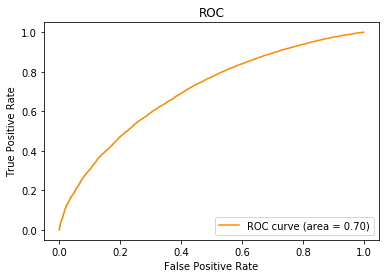

In [109]:
# Plot ROC curve - i.e. plot of true positive rates (sensitivity) against false positive rates (1-specificity) across all 
# probability/classifier thresholds. In other words, this is a plot of power against Type 1 error for my loan status classifier model.

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=logit1.predict_proba(X_test)[:,1], pos_label=1)

roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# AUC or area under ROC curve indicates informativeness of loan status classifier model, i.e. probability that my model will assign
# a higher probability of being fully paid off to a randomly chosen fully paid loan than to a randomly chosen non-fully paid loan.
# An uninformative classifier would have an AUC score of 0.5 (i.e. a random guess would yield a point along the 45 degree line from (0,0)
# to (1,1), or the 'line of no-discrimination' between positive and negative outcomes). By contrast, the best possible prediction 
# method or 'perfect classification' would yield a point at (0,1) - i.e. a TPR of 100% and FPR of 0%. Points above the line of no-discrimination 
# thus represent good classification results (better than random) and vice versa. The higher the AUC score (above 0.5), therefore,
# the more informative the classification model.
# My model has an AUC score of 0.7 - therefore appears to be relatively informative overall (i.e. across all thresholds). 
# Below I will further examine how the AUC varies for different specific probability thresholds from 0.5 to 1, in order to
# choose threshold that appropriate balances true positives and false positives. (Hypothesis: a higher probability threshold 
# will improve model informativeness)

Accuracy of Logistic Model with Different Classification Thresholds 

In [110]:
# Change the classification threshold for our model to 0.8 to get different predictions.
confusion_matrix_2 = metrics.confusion_matrix(y_true=y_test, y_pred=logit1.predict_proba(X_test)[:,1] > .8)
confusion_matrix_2

array([[ 6187,  2526],
       [13074, 18071]], dtype=int64)

In [111]:
#Calculate true positive (sensitivity), true negative (specificity) and other indicators of accuracy for logit model
# with 0.8 probability cutoff

FP = (confusion_matrix_2.sum(axis=0) - np.diag(confusion_matrix_2))[1]  
FN = (confusion_matrix_2.sum(axis=1) - np.diag(confusion_matrix_2))[1]
TP = (np.diag(confusion_matrix_2))[1]
TN = confusion_matrix_2.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR, 'true positive rate/sensitivity')
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR, 'true negative rate/specificity')
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV, 'positive predictive value/precision')
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV, 'negative predictive value')
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR, 'false positive rate')
# False negative rate
FNR = FN/(TP+FN)
print(FNR, 'false negative rate')
# False discovery rate
FDR = FP/(TP+FP)
print(FDR, 'false discovery rate')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC, 'overall accuracy')

# Below shows that with with higher probability cutoff of 0.8, overall accuracy of model drops to 0.6 (from 0.8) and TPR or sensitivity
# drops from almost 100% to ~ 60%. However, specificity or true negative rate improves dramatically to > 70% (i.e. rate of identifying
# NON-FULLY paid loans), and as a result false positive rate drops to just under 30 % (from 93% with 0.5 cutoff).
# Overall, therefore, increasing the probability threshold used for classifying loans as fully paid or not generates a much more 
# informative model for predicting both positive and negative loan status.

0.5802215443891475 true positive rate/sensitivity
0.7100883736944795 true negative rate/specificity
0.8773607806962179 positive predictive value/precision
0.3212190436633612 negative predictive value
0.2899116263055205 false positive rate
0.4197784556108525 false negative rate
0.1226392193037821 false discovery rate
0.6086105675146771 overall accuracy


In [113]:
#Create function that calculates auc score or informativeness of my model under different classification thresholds
# (from 0.5 to 1). 

def auc_thresholds(threshold):

    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=logit1.predict_proba(X_test)[:,1]>threshold, pos_label=1)

    return auc(fpr,tpr)

for threshold in [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
    
    print(auc_thresholds(threshold), 'AUC score for threshold of:' + str(threshold))


#Below shows that AUC score is maximized for threshold of ~0.8 - 
# this classification probability threshold thus yields most informative logistic model with my selected explanatory features.

0.5259841929205786 AUC score for threshold of:0.5
0.5464761304168163 AUC score for threshold of:0.55
0.5708434263145746 AUC score for threshold of:0.6
0.6000808390471797 AUC score for threshold of:0.65
0.6274476424189386 AUC score for threshold of:0.7
0.6444242163597381 AUC score for threshold of:0.75
0.6451549590418135 AUC score for threshold of:0.8
0.6246486166663568 AUC score for threshold of:0.85
0.5791743163030307 AUC score for threshold of:0.9
0.520816417626671 AUC score for threshold of:0.95
0.5 AUC score for threshold of:1


Random Forest Classifier Model 

In [73]:
# train Random Forest Classifier model with initial parameters for no. of estimators (200) and max features (3), 
# and evaluate RMSE via 5-fold cross-validation
from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier(n_estimators=200, max_features=3,oob_score=True,random_state=1)
rfclass.fit(X,y)
y_pred = rfclass.predict(X)

kf = model_selection.KFold(n_splits=5, shuffle=True)

scores = cross_val_score(rfclass, X, y, cv = kf, scoring = "neg_mean_squared_error")
np.mean(np.sqrt(-scores))

0.46491453769144203

In [74]:
# Evaluate accuracy via 5-fold cross-validation
cross_val_score(rfclass, X, y, cv=kf, scoring='accuracy').mean()

#Accuracy similar to logit model above of ~ 80%, much higher than that of null model. Again indicates low relative bias. 

0.7832040069063975

In [75]:
# Compute the out-of-bag R-squared score.
print(rfclass.oob_score_)

# Out-of-bag R-squared also around 80%, relatively high. Indicates low out-of-sample error and thus low variance.

0.7829405824463247


In [77]:
# Compute feature importances.
pd.DataFrame({'feature': X.columns, 'importance':rfclass.feature_importances_}).sort_values(by='importance', ascending=False)

#Below shows that annual income, DTI ratio, revolving balance utilization rate, interest rate and no. of open credit lines are 
# most important features. Purpose, loan grade, home ownership status, employment length and borrower state are relatively less important
# after controlling for aforementioned features. 

,feature,importance
6,annual_inc_norm,0.120914
1,dti,0.120787
4,revol_util,0.114298
0,int_rate,0.105757
5,open_acc,0.090338
3,inq_last_6mths,0.043511
2,delinq_2yrs,0.024231
80,term_ 60 months,0.019531
45,verification_status_Verified,0.014458
44,verification_status_Source Verified,0.014293


In [79]:
# Tune the parameter n_estimators, or no. of trees used. Create list of values to try for n_estimators:
estimator_range = list(range(10, 310, 10))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

kf = model_selection.KFold(n_splits=5, shuffle=True)

# Use five-fold cross-validation with each value of n_estimators
for estimator in estimator_range:
    rfclass = RandomForestClassifier(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfclass, X, y, cv=kf, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

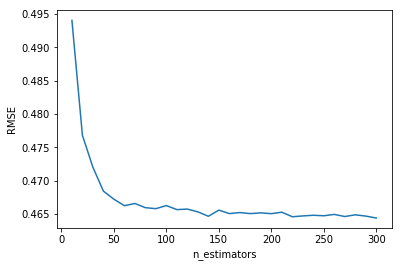

In [80]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).

fig, ax = plt.subplots()
ax.plot(estimator_range, RMSE_scores);
ax.set_xlabel('n_estimators');
ax.set_ylabel('RMSE');

#RMSE decreases with n_estimators (at a diminishing rate) and stabilizes after n_estimators exceeds ~150. Going forward 
# I will choose n_estimators = 150.

In [81]:
# Tune max_features (no. of features considered at each split). List of values to try for max_features:
feature_range = list(range(1, len(X.columns)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 5-fold cross-validation with each value of max_features 
for feature in feature_range:
    rfclass = RandomForestClassifier(n_estimators=150, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfclass, X, y, cv=kf, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

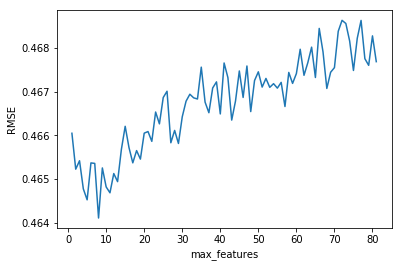

In [82]:
# Plot max_features (x-axis) versus RMSE (y-axis).
fig, ax = plt.subplots()
ax.plot(feature_range, RMSE_scores);
ax.set_xlabel('max_features');
ax.set_ylabel('RMSE');

In [83]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

#Below shows that max_features = 8 generates lowest RMSE (with n_estimators = 150) 

(0.46411225592235883, 8)

In [84]:
# Recalculate model accuracy with max_features = 8 and n_estimators = 150

rfclass = RandomForestClassifier(n_estimators=150, max_features=8,oob_score=True,random_state=1)
rfclass.fit(X,y)
y_pred = rfclass.predict(X)

kf = model_selection.KFold(n_splits=5, shuffle=True)

# Evaluate accuracy via 5-fold cross-validation with new tuned parameters above
cross_val_score(rfclass, X, y, cv=kf, scoring='accuracy').mean()

#Similar accuracy to before (slightly higher)

0.7839190755067877

In [85]:
# Compute the out-of-bag R-squared score with new tuned parameters.
print(rfclass.oob_score_)

0.7818429289159574


In [86]:
# Compute feature importances with new tuned parameters.
pd.DataFrame({'feature': X.columns, 'importance':rfclass.feature_importances_}).sort_values(by='importance', ascending=False)

#Same feature importance ranking as before

,feature,importance
6,annual_inc_norm,0.122780
1,dti,0.121710
4,revol_util,0.112627
0,int_rate,0.106901
5,open_acc,0.083119
3,inq_last_6mths,0.038348
2,delinq_2yrs,0.022265
80,term_ 60 months,0.017224
34,emp_length_10+ years,0.016022
45,verification_status_Verified,0.015521


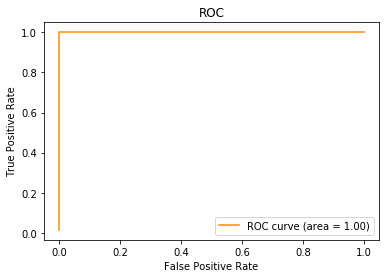

In [87]:
# Plot ROC curve and AUC for random forest model with new tuned parameters

fpr, tpr, thresholds = roc_curve(y_true=y, y_score=rfclass.predict_proba(X)[:,1], pos_label=1)

roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

#Below shows that true positive rate = 100% and false positive rate = 0% under this model, generating a perfect AUC score of 1
# or 100%. Verify this below.

In [93]:
# Get the confusion matrix (with default 0.5 probability cutoff) in order to verify sensitivity, specificity and other 
# measures of model informativeness
y_pred = rfclass.predict(X)
confusion_matrix = metrics.confusion_matrix(y,y_pred)
confusion_matrix


array([[ 34718,      0],
       [     0, 124713]], dtype=int64)

In [95]:
#Calculate true positive (sensitivity), true negative (specificity) and other indicators of informativeness for tuned random forest model
# with default 0.5 probability cutoff

FP = (confusion_matrix.sum(axis=0) - np.diag(confusion_matrix))[1]  
FN = (confusion_matrix.sum(axis=1) - np.diag(confusion_matrix))[1]
TP = (np.diag(confusion_matrix))[1]
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR, 'true positive rate/sensitivity')
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR, 'true negative rate/specificity')
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV, 'positive predictive value/precision')
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV, 'negative predictive value')
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR, 'false positive rate')
# False negative rate
FNR = FN/(TP+FN)
print(FNR, 'false negative rate')
# False discovery rate
FDR = FP/(TP+FP)
print(FDR, 'false discovery rate')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC, 'overall accuracy')

#Below verifies that TPR rate = 100% and FPR = 0%, indicating a perfect classifier using the tuned parameters above (150 trees
# and max_features = 8). 

1.0 true positive rate/sensitivity
1.0 true negative rate/specificity
1.0 positive predictive value/precision
1.0 negative predictive value
0.0 false positive rate
0.0 false negative rate
0.0 false discovery rate
1.0 overall accuracy
